**Import statements**


In [1]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import numpy as np
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

import constants
import functions

%matplotlib inline

**Load Data**

In [2]:
all_static_data = functions.load_static_sensors()
all_static_data = functions.transform_to_grid_coordinates(all_static_data)
mobile_sensor_data = functions.load_mobile_sensors()
mobile_sensor_data = functions.transform_to_grid_coordinates(mobile_sensor_data)

**Compute predictions for stationary sensors**

In [3]:
par_grid = functions.create_par()
start_time = '2018-07-03 00:00:00'
end_time = '2018-07-03 13:45:00'
window = 15
timeint, par_grid = functions.train(all_static_data, mobile_sensor_data, start_time, end_time, par_grid, window)
print (timeint)

54


In [14]:
mae = []
mse = []
squares = []

start_time = '2018-07-03 00:00:00'
start_window = '2018-07-06 14:00:00'
end_window = '2018-07-06 14:15:00'
offset_timeint = 1
number_of_windows = 6
window = 15
par_grid = functions.create_par()
timeint_on_first_window = 0
for i in range(1, number_of_windows+1):
    end_time = start_window
    timeint, par_grid = functions.train(all_static_data, None, start_time, end_time, par_grid, window, timeint_on_first_window)
    print (timeint)
    to_test = functions.test_mobile(par_grid, timeint, all_static_data, start_window, end_window, 1)
    squares.append(to_test.shape[0])
    mae.append(mean_absolute_error(to_test['PM2.5'], to_test['pred_PM2.5']))
    mse.append(mean_squared_error(to_test['PM2.5'], to_test['pred_PM2.5']))
    start_time = end_time
    start_window = (datetime.strptime(start_window, '%Y-%m-%d %H:%M:%S') + timedelta(minutes=15)).strftime("%Y-%m-%d %H:%M:%S")
    end_window = (datetime.strptime(end_window, '%Y-%m-%d %H:%M:%S') + timedelta(minutes=15)).strftime("%Y-%m-%d %H:%M:%S")
    timeint_on_first_window = timeint+1
    

343
344
345
346
347
348


In [15]:
mae

[0.18589935726489312,
 0.35359926951063486,
 0.6974026096552617,
 0.24120104918873067,
 0.7372873235918044,
 0.2744927112092888]

In [6]:
mae_no_online = []
mse_no_online = []
squares_no_online = []

start_window = '2018-07-06 14:00:00'
end_window = '2018-07-06 14:15:00'
offset_timeint = 1
number_of_windows = 6
par_grid = functions.create_par()
start_time = '2018-07-03 00:00:00'
end_time = start_window
timeint, par_grid = functions.train(all_static_data, None, start_time, end_time, par_grid, window)


for i in range(1, number_of_windows+1):
    to_test = functions.test_mobile(par_grid, timeint, all_static_data, start_window, end_window, i)
    squares_no_online.append(to_test.shape[0])
    mae_no_online.append(mean_absolute_error(to_test['PM2.5'], to_test['pred_PM2.5']))
    mse_no_online.append(mean_squared_error(to_test['PM2.5'], to_test['pred_PM2.5']))
    start_window = (datetime.strptime(start_window, '%Y-%m-%d %H:%M:%S') + timedelta(minutes=15)).strftime("%Y-%m-%d %H:%M:%S")
    end_window = (datetime.strptime(end_window, '%Y-%m-%d %H:%M:%S') + timedelta(minutes=15)).strftime("%Y-%m-%d %H:%M:%S")

In [7]:
mae_no_online

[0.18589935726489312,
 0.2919570409388715,
 0.8684935586570083,
 0.9318706227229607,
 0.31656776968918005,
 0.4205635475274752]

In [16]:
print (squares)
print (squares_no_online)

[6, 6, 6, 6, 6, 6]
[6, 6, 6, 6, 6, 6]


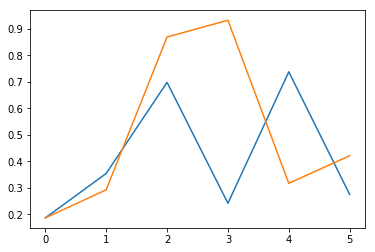

In [18]:
plt.plot(mae)
plt.plot(mae_no_online)

In [10]:
np.mean(mae)

0.41541175539382946

In [11]:
np.mean(mae_no_online)

0.5025586494667315